In [1]:
import torch
import torch.utils.data as Data
import torch.nn.functional as F
from torch.autograd import Variable
import matplotlib.pyplot as plt
%matplotlib inline
torch.manual_seed(1)
import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"

In [2]:
LR = 0.01
#BATCH_SIZE = 32
EPOCH = 12

In [23]:
x = torch.tensor([[0,0],[1,0],[0,1],[1,1]],dtype = torch.float32)
y = torch.tensor([[0,1,1,0]],dtype = torch.float32)
y = y.t()

In [24]:
x.shape

torch.Size([4, 2])

In [25]:
y.shape

torch.Size([4, 1])

In [29]:
class Net(torch.nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.hidden1 = torch.nn.Linear(2, 4)# hidden layer
        self.hidden2 = torch.nn.Linear(4, 4)
        self.predict = torch.nn.Linear(4, 4)   # output layer

    def forward(self, x):
        x = torch.relu(self.hidden1(x)) # activation function for hidden layer
        x = torch.relu(self.hidden2(x))
        x = self.predict(x)             # linear output
        return x

In [30]:
net = Net()
optimizer = torch.optim.SGD(net.parameters(), lr=0.2)
loss_func = torch.nn.MSELoss()

ValueError: x and y must be the same size

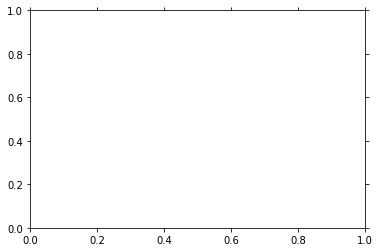

In [31]:
for i in range(100):
    output = net.forward(x)        # get output for every net
    loss = loss_func(output, y)  # compute loss for every net
    optimizer.zero_grad()   # clear gradients for next train
    loss.backward()         # backpropagation, compute gradients
    optimizer.step()
    
    if i % 10 == 0:
        # plot and show learning process
        plt.cla()
        plt.scatter(x.data.numpy(), y.data.numpy())
        plt.plot(x.data.numpy(), prediction.data.numpy(), 'r-', lw=5)
        plt.text(0.5, 0, 'Loss=%.4f' % loss.data.numpy(), fontdict={'size': 20, 'color':  'red'})
        plt.show()
        plt.pause(0.1)